In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
df = pd.read_csv('bdclientes.csv')

In [51]:
df.head()

,IDCLIENTE,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos,Estudios,Estado_civil
0,5008804,M,1.0,1.0,0.0,427500.0,Working,Higher education,Civil marriage
1,5008805,M,1.0,1.0,0.0,427500.0,Working,Higher education,Civil marriage
2,5008806,M,1.0,1.0,0.0,112500.0,Working,Secondary / secondary special,Married
3,5008808,F,0.0,1.0,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married
4,5008809,F,0.0,1.0,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married


In [52]:
df.describe()

,IDCLIENTE,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual
count,3.404740e+05,340473.000000,340473.000000,340473.000000,3.404730e+05
mean,5.824640e+06,0.370150,0.684421,0.428909,1.877160e+05
std,4.527092e+05,0.482845,0.464747,0.727663,1.106003e+05
min,6.000000e+00,0.000000,0.000000,0.000000,2.610000e+04
25%,5.440938e+06,0.000000,0.000000,0.000000,1.215000e+05
50%,5.883296e+06,0.000000,1.000000,0.000000,1.620000e+05
75%,6.144396e+06,1.000000,1.000000,1.000000,2.250000e+05
max,6.841875e+06,1.000000,1.000000,19.000000,6.750000e+06


In [53]:
df['Categoria_ingresos'].value_counts()

Categoria_ingresos
Working                 175434
Commercial associate     78517
Pensioner                58185
State servant            28320
Student                     17
Name: count, dtype: int64

In [54]:
df['Estudios'].value_counts()

Estudios
Secondary / secondary special    233936
Higher education                  91706
Incomplete higher                 11420
Lower secondary                    3179
Academic degree                     232
Name: count, dtype: int64

In [55]:
df['Estado_civil'].value_counts()

Estado_civil
Married                 232922
Single / not married     42730
Civil marriage           28671
Separated                20973
Widow                    15177
Name: count, dtype: int64

In [56]:
df.Estado_civil = df.Estado_civil.replace({'Civil marriage' : 'Married'})
# Se combinaron ambos matrimonios en uno solo

In [57]:
df['Estado_civil'].value_counts()

Estado_civil
Married                 261593
Single / not married     42730
Separated                20973
Widow                    15177
Name: count, dtype: int64

# Para efectos del ejercicio, se eliminará la variable Educacion

In [58]:
df = df.drop('Estudios', axis=1) 
df.Genero.value_counts()
# Para efectos del ejercicio, se eliminará la variable Educacion

Genero
F    229350
M    111123
Name: count, dtype: int64

In [59]:
df.Genero = df.Genero.replace({'F' : 0, 'M' : 1})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16972\2754055289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Genero = df.Genero.replace({'F' : 0, 'M' : 1})


In [60]:
df_dummies = pd.get_dummies(df, columns=['Categoria_ingresos', 'Estado_civil'])

In [61]:
df_dummies.head()

,IDCLIENTE,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,5008804,1.0,1.0,1.0,0.0,427500.0,False,False,False,False,True,True,False,False,False
1,5008805,1.0,1.0,1.0,0.0,427500.0,False,False,False,False,True,True,False,False,False
2,5008806,1.0,1.0,1.0,0.0,112500.0,False,False,False,False,True,True,False,False,False
3,5008808,0.0,0.0,1.0,0.0,270000.0,True,False,False,False,False,False,False,True,False
4,5008809,0.0,0.0,1.0,0.0,270000.0,True,False,False,False,False,False,False,True,False


In [62]:
df_dummies =df_dummies.drop('IDCLIENTE', axis=1)

In [63]:
df_dummies.head()

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,1.0,1.0,1.0,0.0,427500.0,False,False,False,False,True,True,False,False,False
1,1.0,1.0,1.0,0.0,427500.0,False,False,False,False,True,True,False,False,False
2,1.0,1.0,1.0,0.0,112500.0,False,False,False,False,True,True,False,False,False
3,0.0,0.0,1.0,0.0,270000.0,True,False,False,False,False,False,False,True,False
4,0.0,0.0,1.0,0.0,270000.0,True,False,False,False,False,False,False,True,False


In [64]:
df_dummies = df_dummies.replace({True: 1, False: 0})
# Convertir booleanos a 0 y 1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16972\1511691689.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dummies = df_dummies.replace({True: 1, False: 0})


In [65]:
df_dummies.head()

,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Married,Estado_civil_Separated,Estado_civil_Single / not married,Estado_civil_Widow
0,1.0,1.0,1.0,0.0,427500.0,0,0,0,0,1,1,0,0,0
1,1.0,1.0,1.0,0.0,427500.0,0,0,0,0,1,1,0,0,0
2,1.0,1.0,1.0,0.0,112500.0,0,0,0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,270000.0,1,0,0,0,0,0,0,1,0
4,0.0,0.0,1.0,0.0,270000.0,1,0,0,0,0,0,0,1,0


# Normalización

In [66]:
df_norm = (df_dummies - df_dummies.min()) / (df_dummies.max() - df_dummies.min())
# Normalización Min-Max

# Metodo del codo

In [89]:
df_norm.dropna(inplace=True)

wcs =[]
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    wcs.append(kmeans.inertia_)
    # Metodo del codo

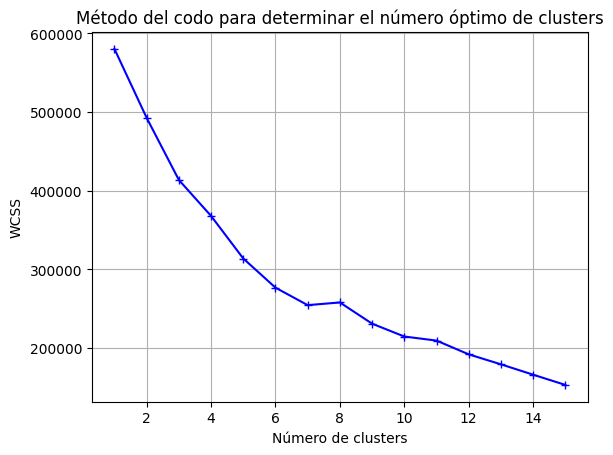

In [90]:
plt.grid()
plt.plot(range(1,16), wcs, marker='+', color='blue')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

# Consultar sobre el método de Silueta

In [91]:
clustering = KMeans(n_clusters=6, max_iter=300, random_state=0)
clustering.fit(df_norm)
center = clustering.cluster_centers_
center

array([[ 3.08308999e-01,  2.88160340e-01,  6.45341120e-01,
         1.46982801e-02,  2.36125690e-02, -2.15383267e-14,
         6.07847106e-15, -6.42541576e-15,  1.32731617e-04,
         9.99867268e-01, -6.25055563e-14,  2.86620653e-01,
         6.07300239e-01,  1.06079108e-01],
       [ 3.65436784e-01,  4.28811595e-01,  6.94766738e-01,
         2.46510477e-02,  2.92093693e-02,  1.00000000e+00,
        -3.78863607e-14,  1.25038868e-14, -1.25564164e-17,
        -2.34257058e-14,  7.72304087e-01,  6.51960722e-02,
         1.40873951e-01,  2.16258899e-02],
       [ 1.51705766e-01,  1.94397181e-01,  7.52393228e-01,
         2.05876899e-03,  1.88772064e-02, -3.05311332e-14,
         1.00000000e+00,  7.77156117e-16, -7.60974400e-18,
         5.65103520e-14,  6.91295007e-01,  6.31262353e-02,
         9.72415571e-02,  1.48337200e-01],
       [ 7.32068400e-01,  8.07698915e-01,  8.21878660e-01,
         3.40611425e-02,  2.60900768e-02, -3.20576898e-14,
        -2.22877272e-14,  4.89885910e-15,  1.

# Función para desnormalizar

In [95]:
def desnormalizar(df, columns_name_list,num_clusters):

    data_desnorm = [[] for _ in range(num_clusters)]

    for i in range(num_clusters):
        for j in range(len(columns_name_list)):
                data_desnorm[i].append(df[columns_name_list[j]].min() + center[i][j]*(df[columns_name_list[j]].max() - df[columns_name_list[j]].min()))

    return np.asarray(data_desnorm)

In [96]:
#Cantidad de cluters
num_clusters = 6

#Nombres de las columnas
columns_name = list(df_norm.columns.values)

df_desnorm = desnormalizar(df_dummies, columns_name, num_clusters)
df_desnorm

array([[ 3.08308999e-01,  2.88160340e-01,  6.45341120e-01,
         2.79267321e-01,  1.84868552e+05, -2.15383267e-14,
         6.07847106e-15, -6.42541576e-15,  1.32731617e-04,
         9.99867268e-01, -6.25055563e-14,  2.86620653e-01,
         6.07300239e-01,  1.06079108e-01],
       [ 3.65436784e-01,  4.28811595e-01,  6.94766738e-01,
         4.68369907e-01,  2.22500878e+05,  1.00000000e+00,
        -3.78863607e-14,  1.25038868e-14, -1.25564164e-17,
        -2.34257058e-14,  7.72304087e-01,  6.51960722e-02,
         1.40873951e-01,  2.16258899e-02],
       [ 1.51705766e-01,  1.94397181e-01,  7.52393228e-01,
         3.91166108e-02,  1.53028448e+05, -3.05311332e-14,
         1.00000000e+00,  7.77156117e-16, -7.60974400e-18,
         5.65103520e-14,  6.91295007e-01,  6.31262353e-02,
         9.72415571e-02,  1.48337200e-01],
       [ 7.32068400e-01,  8.07698915e-01,  8.21878660e-01,
         6.47161708e-01,  2.01527068e+05, -3.20576898e-14,
        -2.22877272e-14,  4.89885910e-15,  1.

In [98]:
names = []
for i in range(num_clusters):
    names.append('Cluster_{}' .format(i+1))
#organizar en un dataframe

df_centroides = pd.DataFrame(df_desnorm.transpose(), columns=names).abs().round(3)
columns_names = pd.Series(df_norm.columns.values)
df_centroides.set_index([columns_names], inplace=True)
df_centroides

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
Genero,0.308,0.365,0.152,0.732,0.096,0.283
Tiene_auto,0.288,0.429,0.194,0.808,0.105,0.379
Tiene_propiedad,0.645,0.695,0.752,0.822,0.536,0.643
Num_hijos,0.279,0.468,0.039,0.647,0.540,0.536
Ingreso_anual,184868.552,222500.878,153028.448,201527.068,162644.490,200388.279
Categoria_ingresos_Commercial associate,0.000,1.000,0.000,0.000,0.000,0.000
Categoria_ingresos_Pensioner,0.000,0.000,1.000,0.000,0.000,0.000
Categoria_ingresos_State servant,0.000,0.000,0.000,0.000,0.000,1.000
Categoria_ingresos_Student,0.000,0.000,0.000,0.000,0.000,0.000
Categoria_ingresos_Working,1.000,0.000,0.000,1.000,1.000,0.000
